# P1 - Perceptual phenomenon

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_path = "data/test_results.csv"

df = pd.read_csv(data_path, sep=';')

t1 = df.Congruent.values
t2 = df.Incongruent.values

def norm_pdf(x, mu, sigma):
    return np.exp(-((x-mu)/sigma)**2/2)/(sigma*np.sqrt(2*np.pi))

## Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.


### 1. What is our independent variable? What is our dependent variable?

Our independent variable is the **word condition**: either congruent or incongruent. 

Our dependent variable is the **time it takes to name the ink colors in seconds**. 

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

H0 : Null hypothesis ==> **the incongruent condition does not increase the average time needed to read the list of words**, i.e. the average recorded time for incongruent words is equal or lower than for congruent words.

H1 : Reject de null ==> **the incongruent condition does increase the average time needed to read the list of words**, i.e. the average recorded time for incongruent words is higher than for congruent words.

As the same person is trying the two different word condition in a row, we are working with **dependent samples**. As we want to evaluate the difference bewteen the mean of these two population sample (and we do not know the mean&standard deviation for the entire population), we are going to follow a **two samples t-test**. 

According to the definition of our null hypothesis, we are focusing on a **one-tailed test**. 

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In order to have a first look at the data, let's check the main indicators (mean, standard deviation, minimum, maximum and quartiles) for the two setsof samples.

In [40]:
print(df.describe())


       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000


We can observe that the means are fairly different, while the standard deviations (with Bessel's correction) remain close. The congruent test sample shows a lower mean that the incongruent test sample, which does not go in the direction of our null hypothesis. 

We can also observe that the mean and the median are close, which is a good sign (but definitely not sufficient) if we want to use approximate or variable distribution by a gaussian law. 



### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Through the following lines of code, we will see the frequency histograms for the 2 test samples.

Out of curiosity, I also plotted the normed histogram with a fitted normal probability density function. 


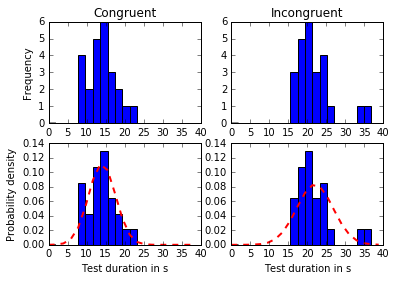

In [41]:
%matplotlib inline  

range_x = (0, 1.1*np.max([t1.max(), t2.max()]))

# Frequency histograms
plt.subplot(2,2,1)
plt.hist(t1, bins = 20, range = range_x, normed=False)
plt.title("Congruent")
plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.hist(t2, bins = 20, range = range_x, normed=False)
plt.title("Incongruent")

# Normed histograms
plt.subplot(2,2,3)
_, bins, _ = plt.hist(t1, bins = 20, range = range_x, normed=True)
y1 = norm_pdf(bins, np.mean(t1), np.std(t1, ddof = 1))
plt.plot(bins, y1, 'r--', linewidth=2)
plt.xlabel("Test duration in s")
plt.ylabel("Probability density")

plt.subplot(2,2,4)
_, bins, _ = plt.hist(t2, bins = 20, range = range_x, normed=True)
y1 = norm_pdf(bins, np.mean(t2), np.std(t2, ddof = 1))
plt.plot(bins, y2, 'r--', linewidth=2)
plt.xlabel("Test duration in s")

plt.show()

It appears that the incongruent test sample is more inclined generally to **higher test duration** than the Congruent. 

We can also observe that the 2 distributions seem to follow a **normal distribution law**, which could have been expected thanks to the **central limit theorem**. Though, as the overall data is quite low (24 candidates per condition), the fitting is not perfect. 


### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?


### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions